In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ratings=pd.read_csv(r'/content/drive/My Drive/combined_data_1.txt',names=['Customer_id','Ratings'],usecols=[0,1],header=None)

In [4]:
#ratings=pd.read_csv(r'D:\DATA SCIENCE\ml\Projects\capstone project\combined_data_1.txt',names=['Customer_id','Ratings','Date of Release'])

In [5]:
ratings

,Customer_id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Customer_id  object 
 1   Ratings      float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [7]:
ratings.isnull().sum()
#Total Number of movies

Customer_id       0
Ratings        4499
dtype: int64

In [8]:
c=[]
for i,j in enumerate  (ratings['Ratings']):
    if pd.isna(j):
        c.append(i)


In [9]:
data=pd.DataFrame(c,columns=['index'])

In [10]:
data.head()

,index
0,0
1,548
2,694
3,2707
4,2850


In [11]:
data.shape


(4499, 1)

In [12]:
movie_df=[]
movie_id=1
for  i, j in zip(data['index'][1:],data['index'][:-1]):
    a=np.full((1,i-j-1),movie_id)
    movie_df=np.append(movie_df,a)
    movie_id=movie_id+1

last=np.full((1,len(ratings)-data.iloc[-1,0]-1),movie_id)
movie_df=np.append(movie_df,last)

print(movie_df)
print(len(movie_df))





[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
24053764


In [13]:
ratings=ratings[pd.notnull(ratings['Ratings'])]
ratings['Movie_id']=movie_df


<ipython-input-13-8ed84dff95da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Movie_id']=movie_df


In [14]:
ratings['Customer_id']=ratings['Customer_id'].astype(int)

<ipython-input-14-f8929b7588c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Customer_id']=ratings['Customer_id'].astype(int)


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Customer_id  int64  
 1   Ratings      float64
 2   Movie_id     float64
dtypes: float64(2), int64(1)
memory usage: 734.1 MB


Text(0, 0.5, 'Percentage')

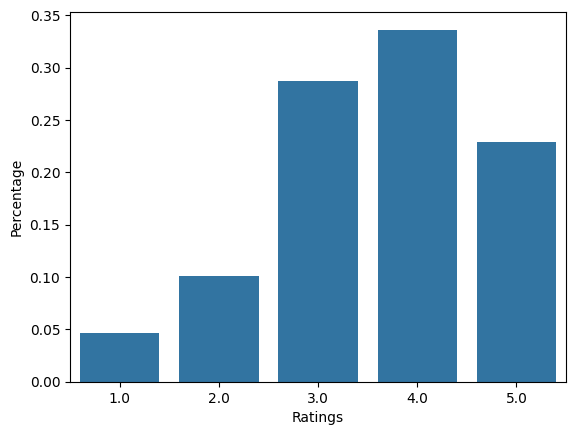

In [16]:
percentage=ratings['Ratings'].value_counts(normalize=True)
percentage
sns.barplot(x=percentage.index , y=percentage.values)
plt.xlabel('Ratings')
plt.ylabel('Percentage')

In [17]:
#Total customer count
ratings['Customer_id'].nunique()


470758

In [18]:
a=ratings.groupby('Movie_id')['Ratings'].count()
a=pd.DataFrame(a)

In [19]:
movie_idcutoff=ratings.groupby('Movie_id')['Ratings'].count().quantile(0.7)
movie_idcutoff

1798.6

In [20]:
movie_filter=a[a['Ratings']>=movie_idcutoff].index

In [21]:
movie_filter

Float64Index([   3.0,    8.0,   16.0,   17.0,   18.0,   26.0,   28.0,   30.0,
                32.0,   33.0,
              ...
              4472.0, 4474.0, 4478.0, 4479.0, 4485.0, 4488.0, 4490.0, 4492.0,
              4493.0, 4496.0],
             dtype='float64', name='Movie_id', length=1350)

In [22]:
b=ratings.groupby('Customer_id')['Ratings'].count()
b=pd.DataFrame(b)
b

,Ratings
Customer_id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [23]:
customerfiltercutoff=ratings.groupby('Customer_id')['Ratings'].count().quantile(0.7)
customerfiltercutoff

52.0

In [24]:
customer_filter=b[b['Ratings']>=customerfiltercutoff].index
customer_filter

Int64Index([      6,       7,      79,      97,     134,     169,     183,
                188,     195,     199,
            ...
            2649308, 2649328, 2649331, 2649335, 2649336, 2649370, 2649378,
            2649388, 2649426, 2649429],
           dtype='int64', name='Customer_id', length=143458)

In [25]:
ratings=ratings[(ratings['Customer_id'].isin(customer_filter))  ]
ratings=ratings[ (ratings['Movie_id'].isin(movie_filter))]

In [26]:
ratings

,Customer_id,Ratings,Movie_id
696,712664,5.0,3.0
697,1331154,4.0,3.0
698,2632461,3.0,3.0
699,44937,5.0,3.0
700,656399,4.0,3.0
...,...,...,...
24056841,520675,3.0,4496.0
24056842,1055714,5.0,4496.0
24056843,2643029,4.0,4496.0
24056845,1559566,3.0,4496.0


In [28]:
movie_title=pd.read_csv(r'movie_titles.csv',encoding='ISO-8859-1',
               header = None,usecols=[0,1,2] ,names = ['Movie_Id', 'Year', 'Name'])

In [29]:
import pandas as pd
#movie_title=pd.read_csv('D:\DATA SCIENCE\ml\Projects\capstone project\movie_titles.csv',encoding='ISO-8859-1',
              # header = None,usecols=[0,1,2] ,names = ['Movie_Id', 'Year', 'Name'])

In [30]:
movie_title.set_index('Movie_Id',inplace=True)

In [31]:
movie_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [32]:
movie_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [33]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162676 sha256=c738401ea9b1f9b4e6c71643649ca82a42d460ffa32a4e703e8880b6a9ca5ac2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [34]:
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [35]:
reader=Reader()

In [51]:
data=Dataset.load_from_df(ratings[['Customer_id','Movie_id','Ratings']][:100000],reader)

In [52]:
svd=SVD()

In [53]:
cross_validate(algo=svd,data=data,measures=['rmse','mae'],cv=4,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    1.0047  0.9880  0.9980  0.9991  0.9974  0.0060  
MAE (testset)     0.8051  0.7863  0.7965  0.7964  0.7961  0.0067  
Fit time          1.38    1.30    2.18    1.43    1.57    0.36    
Test time         0.12    2.08    0.19    0.16    0.64    0.83    


{'test_rmse': array([1.00471681, 0.98798494, 0.99801543, 0.9990596 ]),
 'test_mae': array([0.80511561, 0.78632886, 0.79653796, 0.7963867 ]),
 'fit_time': (1.3847465515136719,
  1.2976372241973877,
  2.1822330951690674,
  1.425443172454834),
 'test_time': (0.11610126495361328,
  2.077674388885498,
  0.1941983699798584,
  0.15799713134765625)}

In [39]:
user_719234=ratings[(ratings['Customer_id']==719234) & (ratings['Ratings']==5)]
user_719234=user_719234.set_index('Movie_id')
user_719234=user_719234.join(movie_title)['Name']

In [48]:
user_719234

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
4487,4488,2000.0,Wonder Boys
4489,4490,2004.0,Ned Kelly
4491,4492,2004.0,Club Dread
4492,4493,2003.0,Ju-on: The Grudge


In [55]:
user_719234=movie_title.copy()
user_719234=user_719234.reset_index()
user_719234=user_719234[user_719234['Movie_Id'].isin(movie_filter)]
data=Dataset.load_from_df(ratings[['Customer_id','Movie_id','Ratings']],reader)
train=data.build_full_trainset()
svd.fit(train)

In [54]:
user_719234['estimator']=user_719234['Movie_Id'].apply(lambda x: svd.predict(719234,x).est)

In [55]:
user_719234.sort_values(by='estimator',ascending=False).reset_index()

,index,Movie_Id,Year,Name,estimator
0,27,28,2002.0,Lilo and Stitch,3.887236
1,17,18,1994.0,Immortal Beloved,3.785150
2,29,30,2003.0,Something's Gotta Give,3.698871
3,2,3,1997.0,Character,3.650450
4,2985,2986,1992.0,Man Bites Dog,3.605640
...,...,...,...,...,...
1345,4495,4496,1993.0,Farewell My Concubine,3.605640
1346,7,8,2004.0,What the #$*! Do We Know!?,3.203631
1347,15,16,1996.0,Screamers,3.122887
1348,16,17,2005.0,7 Seconds,2.964402
